In [1]:
!pip install mlxtend

In [2]:
from mlxtend.data  import  loadlocal_mnist
import platform
import numpy as np 
import pandas as pd
import matplotlib.pyplot as  plt 
import  seaborn as  sns
import numpy as np

## 2 PCA (principal compound analysis)

In [18]:
X,y = loadlocal_mnist(images_path="train-images.idx3-ubyte",labels_path="train-labels.idx1-ubyte")

In [19]:
np.savetxt(fname='images.csv', X=X,  delimiter=',',  fmt='%d')
np.savetxt(fname='labels.csv',X=y,  delimiter=',',  fmt='%d')

In [20]:
df_image =  pd.read_csv('images.csv')
df_image.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_label = pd.read_csv('labels.csv')
df_label.rename(columns={'5':  'label'},inplace = True)
df_label.head()

,label
0,0
1,4
2,1
3,9
4,2


In [24]:
label = df_label["label"]

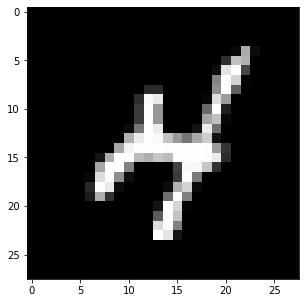

4


In [25]:
ind= np.random.randint(0,20000)
plt.figure(figsize=(20,5))
grid_data =  np.array(df_img.iloc[ind]).reshape(28,28)
plt.imshow(grid_data,  interpolation = None,  cmap =  'gray') 
plt.show()
print(label[ind])

In [26]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
std_df=  scaler.fit_transform(df_img)
std_df.shape

(59999, 784)

In [29]:
covar_matrix=  np.matmul(std_df.T,  std_df)
covar_matrix.shape

(784, 784)

In [31]:
from scipy.linalg import eigh
values,  vectors= eigh(covar_matrix,  eigvals=(782,783))
print("Dimensions of  Eigen vector:",  vectors.shape)
vectors= vectors.T
print("Dimensions of Eigen vector:",  vectors.shape)

Dimensions of  Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


In [32]:
final_df= np.matmul(vectors,  std_df.T)
print("vectros:",  vectors.shape,  "n",  "std_df:",  std_df.T.shape,  "n",  "final_df:",final_df.T.shape)

vectros: (2, 784) n std_df: (784, 59999) n final_df: (59999, 2)


In [39]:
final_dfT=  np.vstack((final_df,  label)).T
dataFrame=  pd.DataFrame(final_dfT,  columns=['PCA 1','PCA 2',   'label'])
dataFrame

,PCA 1,PCA 2,label
0,-7.754260,8.709034,0.0
1,9.430746,2.328239,4.0
2,-3.746570,-6.582143,1.0
3,3.132793,-5.183344,9.0
4,-3.068530,2.198356,2.0
...,...,...,...
59994,-5.119189,-2.039212,8.0
59995,-6.498161,0.607974,3.0
59996,-3.230515,-3.776853,5.0
59997,-4.948296,1.722299,6.0


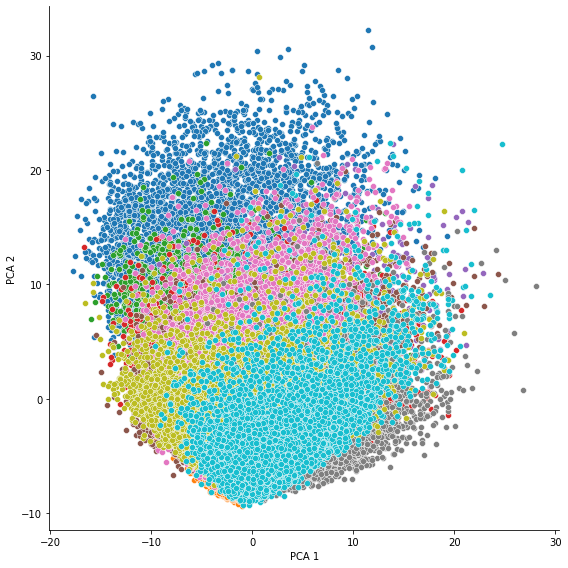

In [40]:
sns.FacetGrid(dataFrame,  hue=  'label',height=8).map(sns.scatterplot,   'PCA 1','PCA 2')
plt.show()

## PROBLEM 2 PCA (a)

In [41]:
train_df=  pd.read_csv("train.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
mean =  train_df.groupby(['label']).mean()
print((mean))

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel77

In [43]:
std =  train_df.groupby(['label']).std()
print((std))

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...   pixel7

In [44]:
x=  train_df.drop(['label'],  axis=1)# displaying the  images with mean of each pi
y= train_df['label']
from sklearn.decomposition  import  PCA
pca	=  PCA(n_components=2)# 10 dimensions
principalCom=  pca.fit_transform(x)
principalDf=  pd.DataFrame(data=  principalCom, columns=['pca_1',   'pca_2'])
df2=  pd.concat([principalDf,  train_df[['label']]],  axis=1)

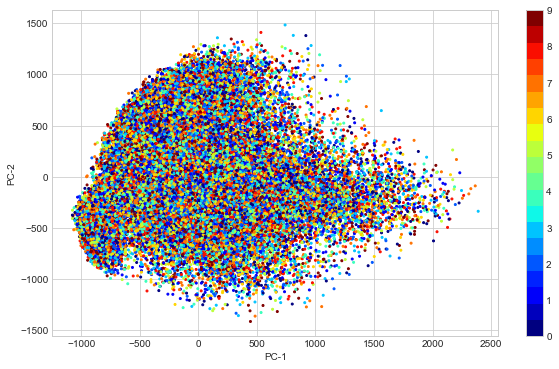

In [65]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
c_map= plt.cm.get_cmap('jet',20)
plt.scatter(principalCom[:,0],  principalCom[:,1],  s=4,cmap= c_map, c= df2['label'][::-1])
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2') 
plt.show()

## problem 3 (PCA)

In [66]:
from  sklearn.metrics  import  r2_score
from  sklearn.metrics  import  mean_squared_error 
from  math  import  sqrt

In [67]:
X=  dataFrame.head(59999)
f=  final_dfT
r2=  r2_score(X,f)
rmse=  sqrt(mean_squared_error(X,f))

In [68]:
pca	=  PCA()
pca.fit(x)

PCA()

In [69]:
pca.n_components_


784

In [70]:
tot=  sum(pca.explained_variance_)
tot

3434021.2457725266

In [71]:
var_exp = [(i/tot)*100 for i in  sorted(pca.explained_variance_,  reverse=True)]
print(var_exp[0:5])

[9.74893768949748, 7.1602662750272215, 6.145903355957284, 5.3793019963275785, 4.894262134042026]


In [72]:
tot=  sum(pca.explained_variance_)
tot

3434021.2457725266

In [73]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_,  reverse=True)]
print(var_exp[0:5])

[9.74893768949748, 7.1602662750272215, 6.145903355957284, 5.3793019963275785, 4.894262134042026]


In [74]:
cum_var_exp	=  np.cumsum(var_exp)

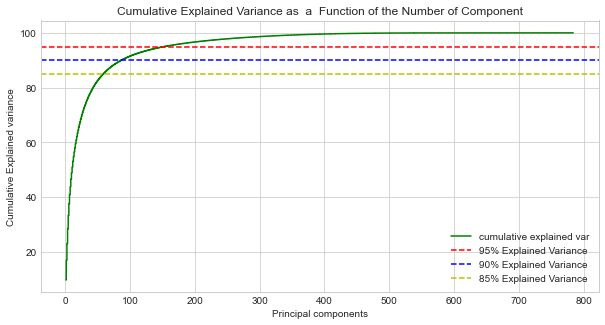

In [79]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 785),  cum_var_exp,color='green',  where='mid',label='cumulative explained var')
plt.title('Cumulative Explained Variance as  a  Function of the Number of Component')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y=95,  color='r',  linestyle='--',  label=  '95% Explained Variance')
plt.axhline(y=90,  color='b',  linestyle='--',  label=  '90% Explained Variance')
plt.axhline(y=85,  color='y',  linestyle='--',  label=  '85% Explained Variance')
plt.legend(loc='best') 
plt.show()